In [10]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [11]:
from random import randint, choice

In [12]:
bits=[]
for i in range(8):
    bit=randint(0,1)
    bits.append(bit)
bits

[1, 0, 1, 1, 1, 0, 1, 1]

In [13]:
basis=[]
for i in range(8):
    base=choice(['X','Z'])
    basis.append(base)
basis

['X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X']

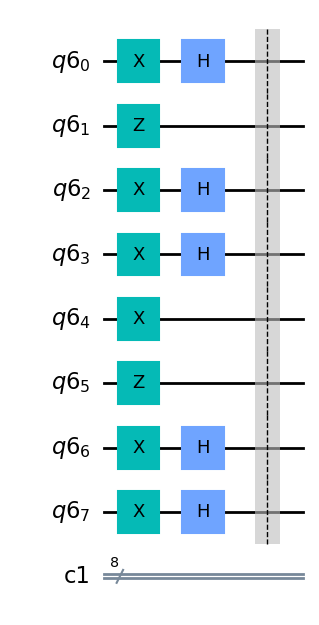

In [14]:
q=QuantumRegister(8)
c=ClassicalRegister(8)
qc=QuantumCircuit(q,c)

for i in range(8):
    if basis[i]=='Z':
        if bits[i]==0:
            qc.z(q[i])
        else:
            qc.x(q[i])
    else:
        if bits[i]==0:
            qc.h(q[i])
        else:
            qc.x(q[i])
            qc.h(q[i])
qc.barrier()
qc.draw()

In [15]:
bobs_base=[]
for i in range(8):
    base=choice(['X','Z'])
    bobs_base.append(base)
bobs_base

['Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X']

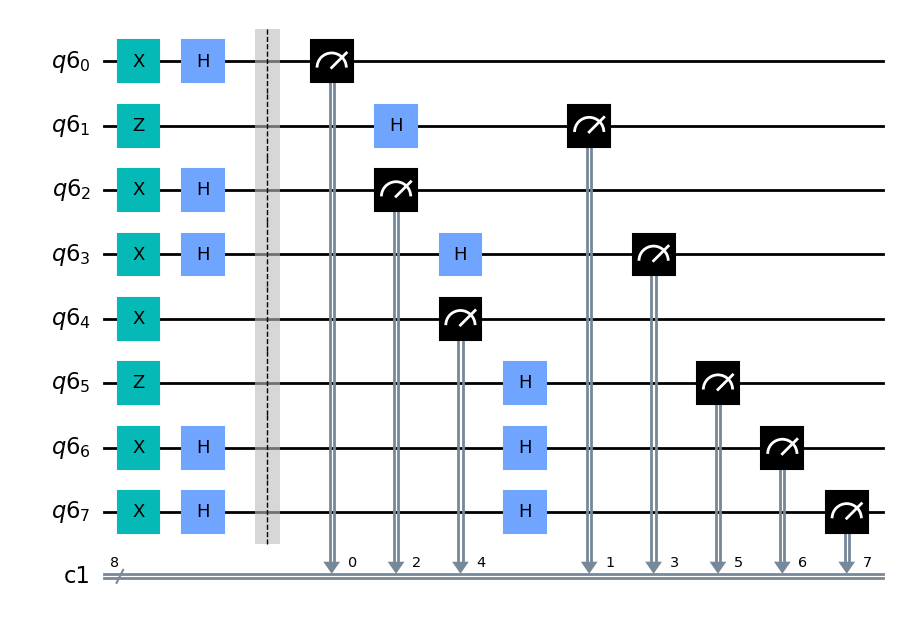

In [16]:
for i in range(8):
    if bobs_base[i]=='Z':
        qc.measure(q[i],c[i])
    else:
        qc.h(q[i])
        qc.measure(q[i],c[i])
qc.draw()

In [17]:
backend=QasmSimulator()
qc_compiled=transpile(qc,backend)
job=backend.run(qc_compiled,shots=1)
result=job.result()
counts=result.get_counts()
print(counts)

{'11111101': 1}


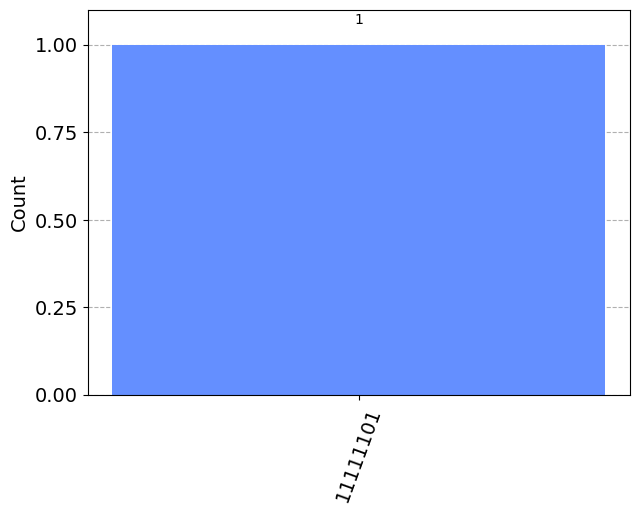

In [18]:
plot_histogram(counts)

In [20]:
for i in range(8):
    if bobs_base[i]==basis[i]:
        print(result[i])

1
1
0
1
